In [515]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from src.mlp import MLP, Layer
from src.visualisation import plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Squares Simple

In [516]:
df_training = pd.read_csv("data/mio1/regression/square-simple-training.csv", index_col=0)
df_test = pd.read_csv("data/mio1/regression/square-simple-test.csv", index_col=0)

x_train = df_training['x'].values.reshape(1, len(df_training))
y_train = df_training['y'].values.reshape(1, len(df_training))

x_test = df_test['x'].values.reshape(1, len(df_test))
y_test = df_test['y'].values.reshape(1, len(df_test))

y_max = np.max(y_train)
y_min = np.min(y_train)
y_train_normalised = (y_train - y_min) / (y_max - y_min)

In [517]:
model = MLP(layers=[
    Layer(1, 4, activation="sigmoid"),
    Layer(4, 4, activation="sigmoid"),
    Layer(4, 1, activation="linear")
])

In [ ]:
loss = model.fit(x_train, y_train_normalised, learning_rate=0.01, epochs=5e4, verbose=1, batch_size=10)

In [531]:
model.save_model("./models", "square-simple")

**Loss history**

<Axes: >

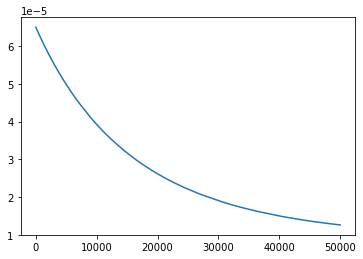

In [526]:
sns.lineplot(loss[0:])

**Model visualisation**

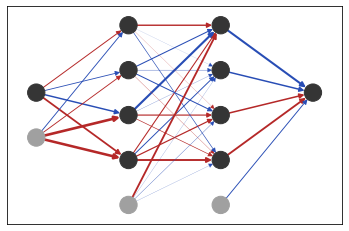

In [527]:
plot(model, log_weights=False)

**Training set MSE**

In [528]:
y_predicted_normalised = model.predict(x_train)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_train, y_predicted))

1.4470013476034365


**Test set MSE**

In [529]:
y_predicted_normalised = model.predict(x_test)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_test, y_predicted))

1.944449866994204


**Data visualisation**

<Axes: >

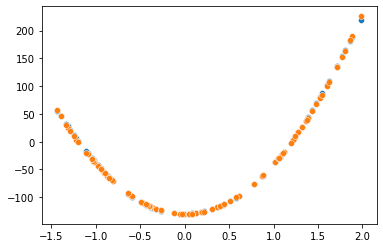

In [530]:
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_predicted.reshape(len(df_test)))
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_test.reshape(len(df_test)))

### Steps Small

In [1045]:
df_training = pd.read_csv("data/mio1/regression/steps-small-training.csv", index_col=0)
df_test = pd.read_csv("data/mio1/regression/steps-small-test.csv", index_col=0)

x_train = df_training['x'].values.reshape(1, len(df_training))
y_train = df_training['y'].values.reshape(1, len(df_training))

x_test = df_test['x'].values.reshape(1, len(df_test))
y_test = df_test['y'].values.reshape(1, len(df_test))

y_max = np.max(y_train)
y_min = np.min(y_train)
y_train_normalised = (y_train - y_min) / (y_max - y_min)

In [1084]:
model = MLP.load_model("./models", "steps-small-low-test-mse")

**Model visualisation**

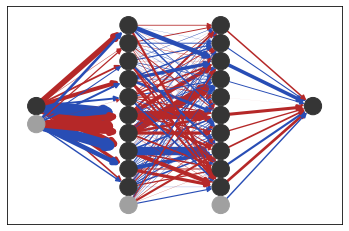

In [1085]:
plot(model, log_weights=False)

**Training set MSE**

In [1086]:
y_predicted_normalised = model.predict(x_train)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_train, y_predicted))

9.495895814112886


**Test set MSE**

In [1087]:
y_predicted_normalised = model.predict(x_test)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_test, y_predicted))

13.18153656922776


**Data visualisation**

<Axes: >

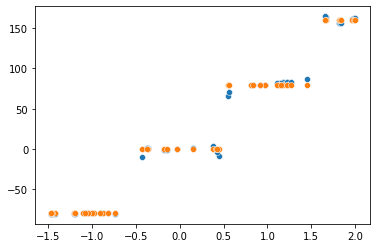

In [1088]:
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_predicted.reshape(len(df_test)))
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_test.reshape(len(df_test)))

In [1092]:
model = MLP.load_model("./models", "steps-small-low-training-mse")

**Model visualisation**

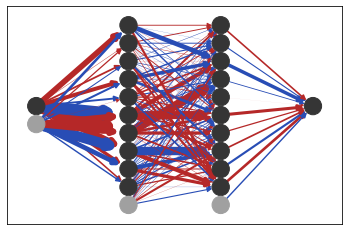

In [1091]:
plot(model, log_weights=False)

**Training MSE**

In [1093]:
y_predicted_normalised = model.predict(x_train)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_train, y_predicted))

0.8639614030395696


**Test MSE**

In [1094]:
y_predicted_normalised = model.predict(x_test)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_test, y_predicted))

55.20777738432906


**Data Visualisation**

<Axes: >

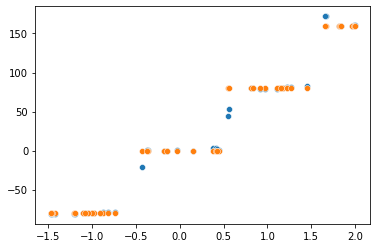

In [1095]:
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_predicted.reshape(len(df_test)))
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_test.reshape(len(df_test)))

### Multimodal Large

In [453]:
df_training = pd.read_csv("data/mio1/regression/multimodal-large-training.csv")
df_test = pd.read_csv("data/mio1/regression/multimodal-large-test.csv")

x_train = df_training['x'].values.reshape(1, len(df_training))
y_train = df_training['y'].values.reshape(1, len(df_training))

x_test = df_test['x'].values.reshape(1, len(df_test))
y_test = df_test['y'].values.reshape(1, len(df_test))

y_max = np.max(y_train)
y_min = np.min(y_train)
y_train_normalised = (y_train - y_min) / (y_max - y_min)

In [455]:
model = MLP(layers=[
    Layer(1, 10, activation="sigmoid"),
    Layer(10, 10, activation="sigmoid"),
    Layer(10, 1, activation="linear")
])

In [ ]:
loss = model.fit(x_train, y_train_normalised, learning_rate=0.002, epochs=20e3, verbose=1, batch_size=1000)

In [510]:
model.save_model("./models", model_name="multi-modal")

In [ ]:
sns.lineplot(loss[0:])

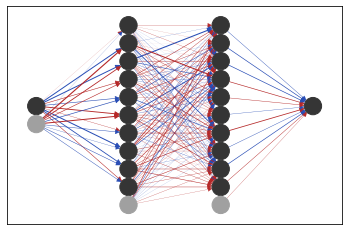

In [511]:
plot(model, log_weights=True)

In [512]:
y_predicted_normalised = model.predict(x_train)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_train, y_predicted))

9.217697097845122


In [513]:
y_predicted_normalised = model.predict(x_test)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_test, y_predicted))

5.4693582611620295


<Axes: >

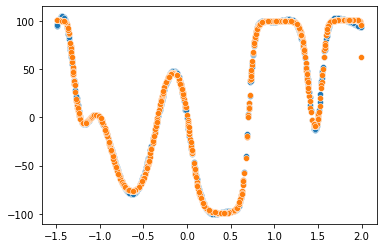

In [514]:
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_predicted.reshape(len(df_test)))
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_test.reshape(len(df_test)))